# Medical Project
### Lars Olsen and Oda Kristensen

We start by importing some packages and modules:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from scipy.stats import norm
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

We read the files:

In [4]:
features = pd.read_csv('historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('historical_Y.dat', header=None, sep=" ").values

In this part of the project we are only interested in the features. The first 128 features are what we obsere; sex, smoker and 126 genes. The 2 last attributes are the symptoms and these can be taken to be akin to labels in supervised learning.

In [5]:
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

We take a look at the observations of the 1st pacient, sex = 0, and non smoker.

In [6]:
observations[0]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

We divide our data set into a traing set and a test set.

In [7]:
obs_train, obs_test, lab_train, lab_test = train_test_split(observations, labels, test_size=0.25)

Let's look at the distribution of symptoms:

(array([3587.,    0.,    0., 3180.,    0.,    0.,  419.,    0.,    0.,
         314.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

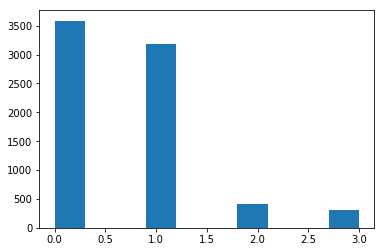

In [8]:
plt.hist(lab_train)

We now take a look at the histogram of observation. 

([array([3762.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3738.]),
  array([5436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2064.]),
  array([3709.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3791.]),
  array([3688.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3812.]),
  array([3725.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3775.]),
  array([3744.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3756.]),
  array([3803.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3697.]),
  array([3759.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3741.]),
  array([3797.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3703.]),
  array([3786.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3714.]),
  array([3712.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3788.]),
  array([3

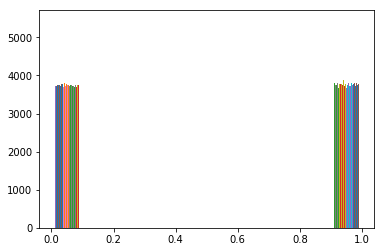

In [9]:
plt.hist(obs_train)

We talked to Summaya Mumtaz in the lab and she said that from this plot we could se that there are two clusters. We are not sure how she did that. For us it just seems that each attribute takes either the value of zero or one, as we know they do from the definition of the data. If we look at only one attribute at the time we agreee that we have two clusters. Take $x_2$, either they smoke ($x_2=1$) or not ($x_2=0$), so we have to clusters. But when we have more dimensions I feel like we have more clusters. Say we look at the two first attributes. Then a person can be either male or female and the can smoke or not smoke, i.e. we have four potential combinations. Think of a square with a cluster in each corner. obviously it can be that there are no female smokers. Then we have three clusters. Then we can think of the clusters as being on a line. Male smokers are more similar to male non-smokers than female non-smokers, and male non-smokers are equally similar to both (assuming equal weighting of the attributes). So we have "male smokers" -- "male non-smokers" -- "female non-smokers". In a hypercube we would still have clusters in each corner, and this gives us $2^{128}$ potential clusters. This is an astronomical number. So we must assume that there is pattern in the data, which will lower this number. 

From the two histograms bellow we see that there are more people of the sex zero and more non-smokers.

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


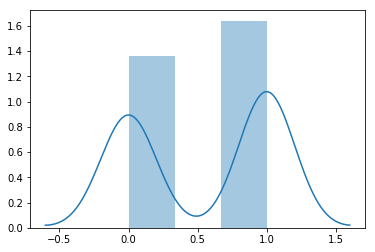

In [10]:
sns.distplot(obs_train[0])

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


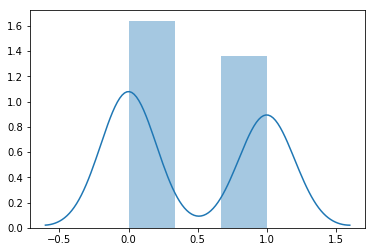

In [11]:
sns.distplot(obs_train[1])

Let's look at the proportions of smokers among sex 0. 

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


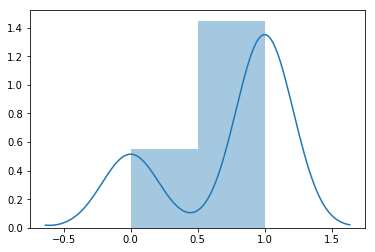

In [12]:
sns.distplot(obs_train[1][obs_train[0] == 0])

Let's look at the proportions of smokers among sex 1.

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


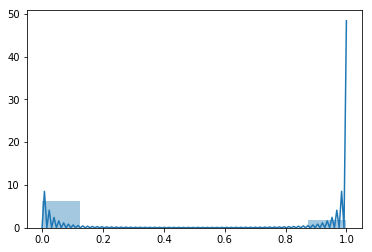

In [13]:
sns.distplot(obs_train[1][obs_train[0] == 1])

We see that there is a higher percentage of sex=0 that smoke than sex=1 that smoke.

### Let's now take a look at the scores with Kmeans

In [14]:
for k in range(1,21):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(obs_train)
    
    # Sum of distances of samples to their closest cluster center.
    interia = kmeans_model.inertia_
    
    print("k = %2d: Interia = %f   Score = %f   Elbow = %f" % (k,interia,kmeans_model.score(obs_test), interia/k))

k =  1: Interia = 239549.282667   Score = -79846.447911   Elbow = 239549.282667
k =  2: Interia = 217616.358386   Score = -72742.361465   Elbow = 108808.179193
k =  3: Interia = 205723.135989   Score = -68968.492063   Elbow = 68574.378663
k =  4: Interia = 197825.569160   Score = -66295.307862   Elbow = 49456.392290
k =  5: Interia = 191524.677904   Score = -64410.779083   Elbow = 38304.935581
k =  6: Interia = 186250.998561   Score = -62488.298111   Elbow = 31041.833094
k =  7: Interia = 181883.682733   Score = -61153.526674   Elbow = 25983.383248
k =  8: Interia = 177917.984800   Score = -59948.446131   Elbow = 22239.748100
k =  9: Interia = 174746.591407   Score = -58948.281042   Elbow = 19416.287934
k = 10: Interia = 172014.988540   Score = -58178.619964   Elbow = 17201.498854
k = 11: Interia = 169704.817964   Score = -57463.519875   Elbow = 15427.710724
k = 12: Interia = 167554.986101   Score = -56689.960379   Elbow = 13962.915508
k = 13: Interia = 165564.734884   Score = -56276.8

We want this score as high as possible. The k with the best score is the k we should chose, i.e. the optimal number of clusters. The problem is that this score will keep incresing to zero when k increase. This is because score look at the distance from each point to the closest cluster centrum (for the test data, Ineteria does the same for the training data), and train and test set takes the same possible values this is a problem. Since then $2^{128}$ will (potentially) be the best k. Usually this score starts to level of, that the increase in absolute value decrese. So one can usually pick a resoanble K, but we are unsure where such a cap should be choosen here. Interia is much bigger due to the bigger dataset. One need to look at -score.

Say that K = 6 is a nice treeshold. We take a closer look at K = 6.

In [17]:
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(obs_train)

In [18]:
kmeans_model.score(obs_test)

-62687.212628782916

In [19]:
for l in range(6):
    print("Number of people in cluster %d: %d" %(l,sum(kmeans_model.labels_ == l)))

Number of people in cluster 0: 1274
Number of people in cluster 1: 1131
Number of people in cluster 2: 1369
Number of people in cluster 3: 1385
Number of people in cluster 4: 1128
Number of people in cluster 5: 1213


We see that the people are fairly divided between the clusters.

In [20]:
for k in range(1,21):
    gm_model = GaussianMixture(n_components=k, max_iter = 200, random_state=1).fit(obs_train)
    
    print("k = %2d: Score = %f" % (k, gm_model.score(obs_test)))

k =  1: Score = -32.603439
k =  2: Score = -27.188233
k =  3: Score = -25.275091
k =  4: Score = -24.016455
k =  5: Score = -21.425464
k =  6: Score = -18.076322
k =  7: Score = -20.838692
k =  8: Score = -18.565873
k =  9: Score = -15.420511
k = 10: Score = -18.877297
k = 11: Score = -21.430816
k = 12: Score = -19.669526
k = 13: Score = -19.959870
k = 14: Score = -16.383825
k = 15: Score = -19.406439
k = 16: Score = -19.771687
k = 17: Score = -21.365973
k = 18: Score = -21.447191
k = 19: Score = -19.663103
k = 20: Score = -22.821534


We now do the same as before but also take a look at the Bic score to find the optimal value. We have done this because of. http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py It was wrong of us to look at BicTest. One should only look at BicTrain. The optimal value is 3. But, 2 is not far of. And since we know that is the truth we go for it.

In [17]:
for k in range(1,10):
    gm_model = GaussianMixture(n_components=k, max_iter = 200, random_state=1).fit(obs_train)
    bic = gm_model.bic(obs_train)
    aic = gm_model.aic(obs_train)
    print("k = %2d: ScoreTrain = %.3f   ScoreTest = %.3f   Bic = %.3f   Aic = %.3f" % (k, gm_model.score(obs_train),gm_model.score(obs_test), bic, aic))

k =  1: ScoreTrain = -31.373   ScoreTest = -32.359   Bic = 545399.189   Aic = 487359.622
k =  2: ScoreTrain = -24.810   ScoreTest = -26.926   Bic = 521777.915   Aic = 405691.858
k =  3: ScoreTrain = -20.511   ScoreTest = -24.019   Bic = 532103.217   Aic = 357970.670
k =  4: ScoreTrain = -17.173   ScoreTest = -22.056   Bic = 556844.621   Aic = 324665.584
k =  5: ScoreTrain = -13.436   ScoreTest = -19.714   Bic = 575616.057   Aic = 285390.530
k =  6: ScoreTrain = -12.238   ScoreTest = -20.020   Bic = 632465.142   Aic = 284193.125
k =  7: ScoreTrain = -9.678   ScoreTest = -218.665   Bic = 668870.530   Aic = 262552.023
k =  8: ScoreTrain = -7.701   ScoreTest = -217.959   Bic = 714044.179   Aic = 249679.183
k =  9: ScoreTrain = -1.213   ScoreTest = -12.901   Bic = 691539.330   Aic = 169127.844


From the values above we see that k=13 is the best choice, but k=6 is not that far off, and since 6 is much lower we conclude that with Gaussian Mixture models the 'optimal' choice is 6 clusters. If we look at the score. But AIC and BIC is betther. Here we see that 2 or 3 is optimal.

In [19]:
gm_model = GaussianMixture(n_components=2, max_iter = 200, random_state=1).fit(obs_train)

In [ ]:
gm_model.predict(obs_)


#### We look at kmeans_silhouette_analysis

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [122]:
for n_clusters in range(2,11):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(obs_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(obs_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.08789046555225062
For n_clusters = 3 The average silhouette_score is : 0.07400565765849043
For n_clusters = 4 The average silhouette_score is : 0.06795148893837454
For n_clusters = 5 The average silhouette_score is : 0.06463853037241843
For n_clusters = 6 The average silhouette_score is : 0.06346335792308268
For n_clusters = 7 The average silhouette_score is : 0.06442224067814628
For n_clusters = 8 The average silhouette_score is : 0.06535853448402974
For n_clusters = 9 The average silhouette_score is : 0.06588064103198324
For n_clusters = 10 The average silhouette_score is : 0.06493274114857885


We see that the score stabilize after 4 clusters.

# Final choice of clusters and features
In the R file OptimalKAndFeatureImportance.R we have calculated the best choice of K and the most important features, based on SilhouetteScore and the importance score from randomforest, respectively. From now on we use the values obtained there. We got that 2 is the optimal number of clusters (see SilhouetteScore.png and SilhouetteScoreAfterFeatureReduction.png) and $x_{6}$, $x_4$, $x_{114}$, $x_{12}$, $x_{84}$, $x_2$ and $x_{56}$ are the most important feautres, in that order. Recall that python counts from 0, so this means columns 5, 3, 113, 11, 83, 1 and 55. 

Start by dividing the people into 2 clusters.

In [24]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(obs_train)

In [26]:
kmeans_model.labels_

array([0, 0, 1, ..., 1, 0, 0])

In [36]:
train_obs_0 = obs_train[kmeans_model.labels_ == 0]
train_obs_1 = obs_train[kmeans_model.labels_ == 1]
train_lab_0 = lab_train[kmeans_model.labels_ == 0]
train_lab_1 = lab_train[kmeans_model.labels_ == 1]

In [32]:
train_obs_0.shape

(3609, 128)

In [40]:
train_lab_0.shape

(3609,)

We now plot the histogram and see that there are more people with symptoms 1 and 3 in the 0 cluster. 
And there are more people with symptoms 0 and 2 in cluster 1.

(array([1269.,    0.,    0., 2071.,    0.,    0.,   95.,    0.,    0.,
         174.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

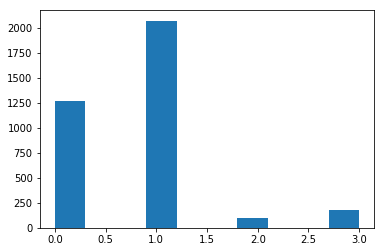

In [38]:
plt.hist(train_lab_0)

(array([2338.,    0.,    0., 1086.,    0.,    0.,  327.,    0.,    0.,
         140.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

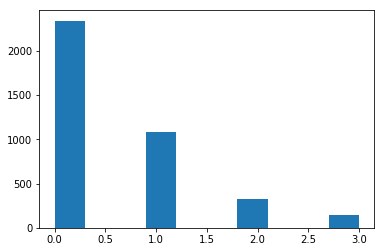

In [39]:
plt.hist(train_lab_1)

# Question 2

Next, we want to observe the effects of two different therapeutic interventions, one of which is placebo, and the other is an experimental drug. First we calculate the success of the two treatments in the whole data set. Here we assume that treatment 0 is placebo and treatment 1 is active treatment, but it could very well be the other way around. We also assume that Y = 1 means that the patient is cured, and Y = 0 means that the patient is not cured. 

In [76]:
#I want pandas
features = pd.read_csv('historical_X.dat', header=None, sep=" ")
actions = pd.read_csv('historical_A.dat', header=None, sep=" ")
outcome = pd.read_csv('historical_Y.dat', header=None, sep=" ")


active_treatments = 0
success_placebo = 0
success_active = 0

active_treatments = sum(actions.loc[:,0])


for i in range(len(actions)):
    if actions.loc[i,0] == 1 and outcome.loc[i,0] == 1:
        success_active += 1
    elif actions.loc[i,0] == 0 and outcome.loc[i,0] == 1:
        success_placebo += 1


print("The effectiveness of placebo is: %f " %(success_placebo/(10000-active_treatments)))
print("The effectiveness of active treatment is: %f " %(success_active/(active_treatments)))

The effectiveness of placebo is: 0.008959 
The effectiveness of active treatment is: 0.588338 


We see that the treatment is effective in 58.8% of the cases for treatment 1, and 0.9% effective for treatment 0. 

Next, we want to investigate whether there are some parameters that effect the outcome of the treatment. I.e. if there are some genes or other parameters that affect the effect of the treatment. From previous parameter selection, we found that the most important features were $X_2$, $X_4$, $X_6$, $X_{12}$, $X_{56}$, $X_{84}$, $X_{114}$. To find out if there is some interaction between some parameters, we choose these features and also include the action feature, and do logistic regression for models with interactions with parameter selection. For code see $\texttt{LogRegInteract.R}$

The text above is the output from R after we have done a parameter selection using BIC, allowing interactions of second order. We see here that the only interaction term including $A$, kept by the feature selection is the interaction between $X_84$ and $A$. The interaction term is positive, meaning that the treatment is more successfull when the $X_84$ feature is present. We repeat this process, but this time using AIC as selection criterion and get the following model. 


From this model, it does not seem like any features have a negative interaction with $A$, meaning that treatment1 will be effective for all features. However we do observe that some features and some feature combinations seems to have a negative effect on the result of the treatment. In both the AIC and the BIC model, the presence of the $X2$ feature influences the result of the treatment in a negative way, meaning that these patients are less likely of being cured. Also, both models indicate that the feature combination of $X_4$ and $X_6$ influence the result of the treatment in a negative way. Based on this, we would always recommend the active treatment.  

We would also like to investigate whether the clusters found by K-means clustering are affected differently by the treatment. We found that two clusters were the optimal number of clusters. We choose to do this on the whole data set, so that all the data are divided into one of the two clusters. We are not sure whether this is the correct approach, or if we should only fit the test data, so please correct us if we are wrong. For this, we repeat the procedure of the first part of Question 2, but this time dividing the data into the two clusters. 

In [138]:
# First fit a K-means
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(obs_train)

#Divide observations into two clusters. 
cluster = kmeans.predict(observations)  
index_cluster0 = np.where(cluster == 0) 
index_cluster1 = np.where(cluster == 1)

actions_cluster0 = actions.iloc[index_cluster0]
outcome_cluster0 = outcome.iloc[index_cluster0]

actions_cluster1 = actions.iloc[index_cluster1]
outcome_cluster1 = outcome.iloc[index_cluster1]


active_treatments0 = sum(actions_cluster0.loc[:,0])
active_treatments1 = sum(actions_cluster1.loc[:,0])


#First cluster 0:
#Successfull and active treatments if both are 1
success_active0 = np.sum(np.multiply(actions_cluster0.values, outcome_cluster0.values))
#Successfull, active treatments if outcome is 1, but active is 0
success_placebo0 = np.sum(outcome_cluster0.values) - success_active0


print("The effectiveness of placebo in cluster 0 is: %f " %(success_placebo0/(actions_cluster0.shape[0]-active_treatments0)))
print("The effectiveness of active treatment in cluster 0 is: %f " %(success_active0/(active_treatments0)))        


#Cluster 1
success_active1 = np.sum(np.multiply(actions_cluster1.values, outcome_cluster1.values))
success_placebo1 = np.sum(outcome_cluster1.values) - success_active1

print("The effectiveness of placebo in cluster 1 is: %f " %(success_placebo1/(actions_cluster1.shape[0]-active_treatments1)))
print("The effectiveness of active treatment in cluster 1 is: %f " %(success_active1/(active_treatments1)))        




The effectiveness of placebo in cluster 0 is: 0.001202 
The effectiveness of active treatment in cluster 0 is: 0.470206 
The effectiveness of placebo in cluster 1 is: 0.018064 
The effectiveness of active treatment in cluster 1 is: 0.667636 


We see that the a bigger proportion of patients in cluster 1 are cured than in cluster 0, this apply both to the active treatment and the placebo treatment.   

As we saw in $\texttt{SilhouetteScoreAfterFeatureReduction.png}$, the clusters were more separated when we only kept the most important features. Maybe the differences in effect of treatment between the two clusters will be even more apparent if we cluster the observations based on only these most important features. 

In [143]:
important_features = features[[1, 3, 5, 55, 83 , 113]]
if_train, if_test = train_test_split(important_features, test_size=0.25)

kmeans_if = KMeans(n_clusters=2, random_state=1).fit(if_train)
cluster_if = kmeans_if.predict(important_features)


index_cluster0_if = np.where(cluster_if == 0) 
index_cluster1_if = np.where(cluster_if == 1)

actions_cluster0_if = actions.iloc[index_cluster0_if]
outcome_cluster0_if = outcome.iloc[index_cluster0_if]

actions_cluster1_if = actions.iloc[index_cluster1_if]
outcome_cluster1_if = outcome.iloc[index_cluster1_if]


active_treatments0_if = sum(actions_cluster0_if.loc[:,0])
active_treatments1_if = sum(actions_cluster1_if.loc[:,0])


#First cluster 0:
#Successfull and active treatments if both are 1
success_active0_if = np.sum(np.multiply(actions_cluster0_if.values, outcome_cluster0_if.values))
#Successfull, active treatments if outcome is 1, but active is 0
success_placebo0_if = np.sum(outcome_cluster0_if.values) - success_active0_if


print("The effectiveness of placebo in cluster 0 is: %f " %(success_placebo0_if/(actions_cluster0_if.shape[0]-active_treatments0_if)))
print("The effectiveness of active treatment in cluster 0 is: %f " %(success_active0_if/(active_treatments0_if)))        


#Cluster 1
success_active1_if = np.sum(np.multiply(actions_cluster1_if.values, outcome_cluster1_if.values))
success_placebo1_if = np.sum(outcome_cluster1_if.values) - success_active1_if

print("The effectiveness of placebo in cluster 1 is: %f " %(success_placebo1_if/(actions_cluster1_if.shape[0]-active_treatments1_if)))
print("The effectiveness of active treatment in cluster 1 is: %f " %(success_active1_if/(active_treatments1_if)))        






The effectiveness of placebo in cluster 0 is: 0.010493 
The effectiveness of active treatment in cluster 0 is: 0.578473 
The effectiveness of placebo in cluster 1 is: 0.007727 
The effectiveness of active treatment in cluster 1 is: 0.614173 


These numbers are different from the ones we got previously, when all the features were included. We were hoping to find bigger differences between the clusters using only the most important features, however, the effect of the treatment is more similar between the two clusters when the observations are clustered only by the important features. 

# Part two

### Exercise 1 (Meassuring utility)

#### 1. Measure the utility of $\pi_0$ on the historical data.

In [29]:
# Actions is an array of 0's and 1's, representing 'placebo' and 'experimantal drug', respectively.
print(actions)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [32]:
# Outcome is an array of 0' and 1's, representing 'no effect' and 'measurable effect', respectively.
print(outcome)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


The utility function is given as
$$\sum_t r_t = \sum_t (-0.1a_t + y_t).$$
Here the -0.1 factor implies that the active treatment must be at least 10% more effective than the placebo for the utility to be better for the experimental drug than the placebo. We look at the utility of $\pi_0$ on the historical data.

In [34]:
U = np.sum(-0.1*actions + outcome)
U

1191.2

We see that the utility is 1191.2. We are not confident on wheter or not this is a good result. One should note that $t$ span from 1 to 10 000. So the maximal utility we can achieve is 10 000. However, it that scenario we give placebos to all the patients and we see a measuarble effect in all of them, which is highly unlikely. We see that giving a patient the experimental drug decrease the utility, if not the experimental drug affect the outcome in a postive direction. 

The exercise asks for the expected utility. We cannot calculate it exactly, but we can estimate it from the data. That is what we have done above. Below we describe it futher.
$$\hat{E[U]} = E_{data}[U] = \sum_t (-0.1E_{data}[a_t] + E_{data}[y_t])$$ where $E_{data}[a_t] = \sum(0p(a_t=0) + 1p(a_t=1)) = \sum (\frac{\# a_t = 1}{\# a_t})$ and $E_{data}[y_t] = \sum(0p(y_t=0) + 1p(y_t=1)) = \sum (\frac{\# y_t = 1}{\# y_t})$.

In [70]:
np.sum(outcome==1)/len(outcome)

0.1421

In [71]:
np.sum(actions==1)/len(actions)

0.2298

In [72]:
10000*(-0.1*0.2298 + 0.1421)

1191.2

Which was the same as we got above, as expected.
We have also implemented this in the python file we have delivered.
Simply call policy.estimate_utility(features, actions, outcome).

#### 2. Provide error bounds on the expected utility
To provide error bounds on the expected utility we use bootstraping. We create $B$ datasets by sampling from the original data $10 000$ times with replacement. For each of the $B$ dataset we calculate the expected utility. To get, let's say, a 95% error bound we look at the 2.5% and 97.5% quantile.

In [61]:
B = 500
results = np.zeros(B)

for b in range(B):
    n = len(outcome)
    indices = np.random.choice(n, n)
    outcome_bootstrap = outcome[indices]
    action_bootstrap = actions[indices]
    results[b] = np.sum(-0.1*action_bootstrap + outcome_bootstrap)

In [62]:
bounds = np.percentile(results, [2.5, 97.5])
bounds

array([1127.9075, 1261.5225])

From this we see that a 95% CI for the utility is $[1127.9075, 1261.5225]$. So the utility of $\pi_0$ is well inside these error bounds.

### Exercise 2 (Improved policies)


### 1.

We want to improve the policy, so that we can increase the utility. For the model, we choose a neural network and logistic regression, which we fit by first making an object of the classes $\texttt{NNRecommender}$ and $\texttt{LogisticRecommender}$, in the file $\texttt{TestRecommender.py}$, where we set the reward function to what it is defined as in the project description. We then call the policies' $\texttt{fit_treatment_outcome}$-function, so that our policies are trained on the historical data. To find the estimated utility of these improved models, we call $\texttt{policy_NN.estimate_utility(features, None, None, policy.NN)}$ and $\texttt{policy_logistic.estimate_utility(features, None, None, policy.logistic)}$. Note that when a $\texttt{policy}$ argument is given to the $\texttt{estimate_utility}$-function, the $\texttt{policy}$ will recommend an action, and it is these actions (and the probabilities of the different outomes) that are used to calculate the estimated utility.   

### 2.


Run $\texttt{TestRecommender.py}$ to see the results. Below you can see the last printout from $\texttt{TestRecommender.py}$. From this we see that both logistic regression and neural network are better than the historical policy.